In [12]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

In [149]:
a0 = pd.read_csv('A0B0.csv', sep = ',', names = ['Time', 'NADPH'])
a05 = pd.read_csv('A0.5B24.csv', sep = ',', names = ['Time', 'NADPH'])
a1 = pd.read_csv('A1B24.csv', sep = ',', names = ['Time', 'NADPH'])
a2 = pd.read_csv('A2B24.csv', sep = ',', names = ['Time', 'NADPH'])
a4 = pd.read_csv('A4B24.csv', sep = ',', names = ['Time', 'NADPH'])
a8 = pd.read_csv('A8B24.csv', sep = ',', names = ['Time', 'NADPH'])

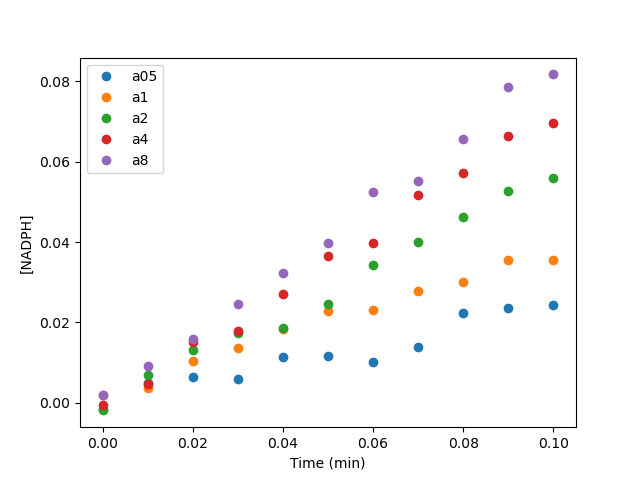

In [150]:
fig, ax = plt.subplots()
ax.plot(a05.Time, a05.NADPH , 'o',label = 'a05')
ax.plot(a1.Time, a1.NADPH , 'o',label = 'a1')
ax.plot(a2.Time, a2.NADPH , 'o',label = 'a2')
ax.plot(a4.Time, a4.NADPH , 'o',label = 'a4')
ax.plot(a8.Time, a8.NADPH , 'o',label = 'a8')
ax.set_xlabel('Time (min)')
ax.set_ylabel('[NADPH]')
ax.legend(loc='best')

In [155]:
b0 = pd.read_csv('A0B0.csv', sep = ',', names = ['Time', 'NADPH'])
b15 = pd.read_csv('A8B1.5.csv', sep = ',', names = ['Time', 'NADPH'])
b3 = pd.read_csv('A8B3.csv', sep = ',', names = ['Time', 'NADPH'])
b6 = pd.read_csv('A8B6.csv', sep = ',', names = ['Time', 'NADPH'])
b12 = pd.read_csv('A8B12.csv', sep = ',', names = ['Time', 'NADPH'])
b24= pd.read_csv('A8B24.csv', sep = ',', names = ['Time', 'NADPH'])

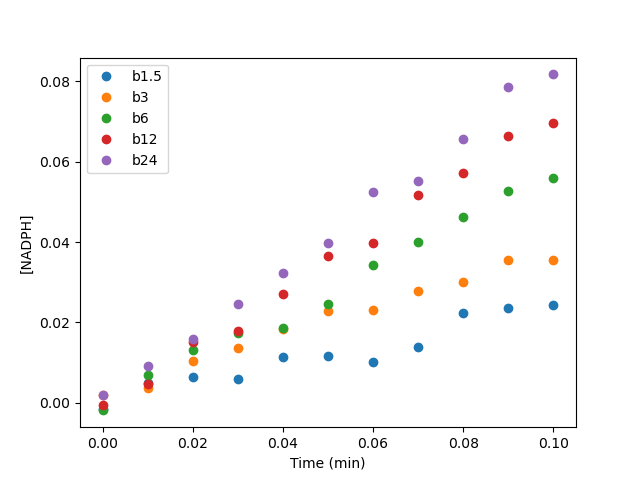

In [156]:
fig, ax = plt.subplots()
ax.plot(b15.Time, a05.NADPH , 'o',label = 'b1.5')
ax.plot(b3.Time, a1.NADPH , 'o',label = 'b3')
ax.plot(b6.Time, a2.NADPH , 'o',label = 'b6')
ax.plot(b12.Time, a4.NADPH , 'o',label = 'b12')
ax.plot(b24.Time, a8.NADPH , 'o',label = 'b24')
ax.set_xlabel('Time (min)')
ax.set_ylabel('[NADPH]')
ax.legend(loc='best')

In [157]:
rega0 = sp.stats.linregress(a0)
rega05 = sp.stats.linregress(a05)
rega1 = sp.stats.linregress(a1)
rega2 = sp.stats.linregress(a2)
rega4 = sp.stats.linregress(a4)
rega8 = sp.stats.linregress(a8)

In [158]:
regressionsA = [rega0, rega05, rega1, rega2, rega4, rega8]
RatesA = []
for reg in regressionsA:
    print(reg.slope)
    RatesA.append(reg.slope)
RatesA = np.array(RatesA)
# slopes = initial rates

0.004954646341627726
0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143


In [159]:
regb0 = sp.stats.linregress(b0)
regb15 = sp.stats.linregress(b15)
regb3 = sp.stats.linregress(b3)
regb6 = sp.stats.linregress(b6)
regb12 = sp.stats.linregress(b12)
regb24= sp.stats.linregress(b24)

In [160]:
regressionsB = [regb0, regb15, regb3, regb6, regb12, regb24]
RatesB = []
for reg in regressionsB:
    print(reg.slope)
    RatesB.append(reg.slope)
RatesB = np.array(RatesB)
# slopes = initial rates

0.004954646341627726
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761
0.8250788434733143


In [163]:
RatesA

array([0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
       0.82507884])

In [164]:
RatesB

array([0.00495465, 0.25422083, 0.36795357, 0.55640883, 0.70120398,
       0.82507884])

In [166]:
Data = np.array([[0,0,rega0.slope],[0.5,24, rega05.slope],[1,24,rega1.slope],[2,24,rega2.slope],[4,24,rega4.slope],[8,24,rega8.slope],[8,1.5,regb15.slope],[8,3,regb3.slope],[8,6,regb6.slope],[8,12,regb12.slope]])


In [167]:
Com_Data = pd.DataFrame(Data, columns=['a','b','rates'])

In [168]:
Com_Data

a     b     rates
0  0.0   0.0  0.004955
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

In [170]:
def v(Vf, Ka,Kb, a, b):
    return ((Vf)*(a)*(b))/((Ka + a)*(Kb + b))

In [142]:
mymod = mymod = Model(v, independent_vars=['a', 'b'])
mypar = mymod.make_params(Vf=1,Ka=1,Kb=1)
myfit = mymod.fit(Com_Data.rates, mypar, a = Com_Data.a, b = Com_Data.b)
myfit

In [96]:
Data

array([[0.00000000e+00, 0.00000000e+00, 4.95464634e-03],
       [5.00000000e-01, 2.40000000e+01, 2.41186612e-01],
       [1.00000000e+00, 2.40000000e+01, 3.52630445e-01],
       [2.00000000e+00, 2.40000000e+01, 5.74650070e-01],
       [4.00000000e+00, 2.40000000e+01, 7.32285664e-01],
       [8.00000000e+00, 2.40000000e+01, 8.25078843e-01],
       [8.00000000e+00, 1.50000000e+00, 2.54220832e-01],
       [8.00000000e+00, 3.00000000e+00, 3.67953570e-01],
       [8.00000000e+00, 6.00000000e+00, 5.56408829e-01],
       [8.00000000e+00, 1.20000000e+01, 7.01203980e-01]])

In [175]:
a_C_Data = np.array([0.5,1,2,4,8])

In [176]:
a_C_Data

array([0.5, 1. , 2. , 4. , 8. ])

In [177]:
a_R_Data = np.array([rega05.slope,rega1.slope,rega2.slope,rega4.slope,rega8.slope])

In [178]:
a_R_Data

array([0.24118661, 0.35263044, 0.57465007, 0.73228566, 0.82507884])

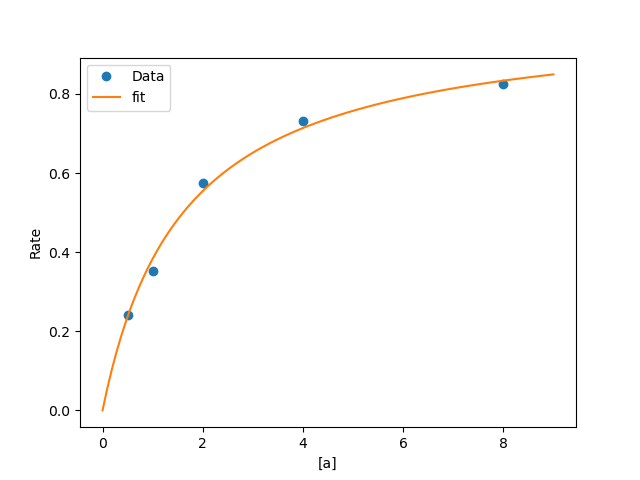

In [179]:
fig, ax=plt.subplots()
avals = np.linspace(0,9,101)
ax.plot(a_C_Data, a_R_Data, 'o', label = 'Data')
ax.plot(avals, myfit.eval(a=avals, b=24), label='fit')
ax.set_xlabel('[a]')
ax.set_ylabel('Rate')
ax.legend(loc='best')

In [185]:
b_C_Data = np.array([1.5,3,6,12])

In [186]:
b_C_Data

array([ 1.5,  3. ,  6. , 12. ])

In [187]:
b_R_Data = np.array([regb15.slope, regb3.slope, regb6.slope, regb12.slope])

In [188]:
b_R_Data

array([0.25422083, 0.36795357, 0.55640883, 0.70120398])

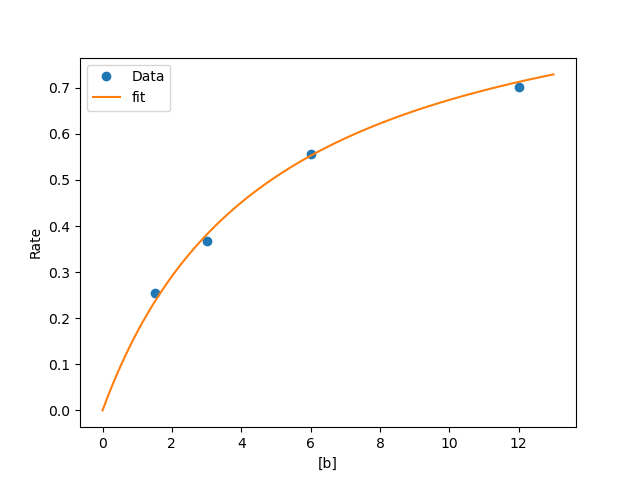

In [189]:
fig, ax=plt.subplots()
bvals = np.linspace(0,13,101)
ax.plot(b_C_Data, b_R_Data, 'o', label='Data')
ax.plot(bvals, myfit.eval(b=bvals, a=8), label='fit')
ax.set_xlabel('[b]')
ax.set_ylabel('Rate')
ax.legend(loc='best')